In [1]:
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\Users\shara\Desktop\stock prices.csv")
df.head()

,Date,Open,High,Low,Close,Volume,(High-Low),(Open-Close)
0,01-01-2015,286.31,289.27,285.24,287.99,14549,4.03,-1.68
1,02-01-2015,287.99,292.51,287.99,288.59,24711,4.52,-0.60
2,05-01-2015,288.59,290.01,280.31,281.47,28104,9.70,7.12
3,06-01-2015,282.01,282.01,266.19,268.01,43190,15.82,14.00
4,07-01-2015,265.51,271.01,265.01,266.44,201960,6.00,-0.93


In [5]:
df.tail()

,Date,Open,High,Low,Close,Volume,(High-Low),(Open-Close)
1311,24-04-2020,86.20,88.55,83.50,83.70,112930,5.05,2.50
1312,27-04-2020,87.05,87.05,84.50,86.20,68677,2.55,0.85
1313,28-04-2020,86.50,88.90,84.25,88.25,101466,4.65,-1.75
1314,29-04-2020,88.35,92.00,87.45,91.70,101149,4.55,-3.35
1315,30-04-2020,94.00,100.50,92.00,98.95,609128,8.50,-4.95


In [6]:
df1=df.reset_index()['Close']

In [7]:
df1

0       287.99
1       288.59
2       281.47
3       268.01
4       266.44
         ...  
1311     83.70
1312     86.20
1313     88.25
1314     91.70
1315     98.95
Name: Close, Length: 1316, dtype: float64

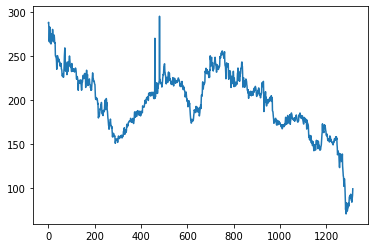

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)
# plt.show()

In [10]:
import numpy as np

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[0.96660153]
 [0.9692663 ]
 [0.93764434]
 ...
 [0.07949902]
 [0.09482146]
 [0.12702079]]


In [13]:
training_size=int(len(df1)*0.7)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size , test_size

(921, 395)

In [15]:
train_data

array([[0.96660153],
       [0.9692663 ],
       [0.93764434],
       [0.87786463],
       [0.87089181],
       [0.90775449],
       [0.94537218],
       [0.91330609],
       [0.87591046],
       [0.86334162],
       [0.86942619],
       [0.85978859],
       [0.86747202],
       [0.8805294 ],
       [0.87546634],
       [0.89220998],
       [0.91295079],
       [0.89443063],
       [0.93351395],
       [0.90975306],
       [0.87608812],
       [0.87066975],
       [0.87280156],
       [0.90397939],
       [0.88701368],
       [0.90406822],
       [0.88954521],
       [0.86658376],
       [0.86480725],
       [0.86658376],
       [0.80369515],
       [0.79672233],
       [0.79872091],
       [0.79183692],
       [0.78619648],
       [0.76949725],
       [0.73165749],
       [0.75142121],
       [0.73876355],
       [0.80071949],
       [0.79348019],
       [0.7910819 ],
       [0.77571505],
       [0.77207319],
       [0.78397584],
       [0.77829099],
       [0.78148872],
       [0.766

In [16]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [17]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train)

[[0.96660153 0.9692663  0.93764434 ... 0.74675786 0.74000711 0.74444839]
 [0.9692663  0.93764434 0.87786463 ... 0.74000711 0.74444839 0.72033221]
 [0.93764434 0.87786463 0.87089181 ... 0.74444839 0.72033221 0.76088115]
 ...
 [0.71171611 0.71593533 0.73814177 ... 0.60690176 0.59513235 0.58758216]
 [0.71593533 0.73814177 0.7161574  ... 0.59513235 0.58758216 0.58824836]
 [0.73814177 0.7161574  0.72370759 ... 0.58758216 0.58824836 0.60001777]]


In [19]:
print(X_train.shape), print(y_train.shape)

(820, 100)
(820,)


(None, None)

In [28]:
print(X_test.shape) , print(ytest.shape)

(294, 100, 1)
(294,)


(None, None)

In [20]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [29]:
print(X_train.shape)

(820, 100, 1)


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Train on 820 samples, validate on 294 samples
Epoch 1/50
820/820 [==============================] - 28s 35ms/sample - loss: 0.1162 - val_loss: 0.0067
Epoch 2/50
820/820 [==============================] - 10s 12ms/sample - loss: 0.0110 - val_loss: 0.0269
Epoch 3/50
820/820 [==============================] - 9s 11ms/sample - loss: 0.0057 - val_loss: 0.0085
Epoch 4/50
820/820 [==============================] - 10s 12ms/sample - loss: 0.0033 - val_loss: 0.0124
Epoch 5/50
820/820 [==============================] - 10s 12ms/sample - loss: 0.0026 - val_loss: 0.0118
Epoch 6/50
820/820 [==============================] - 10s 12ms/sample - loss: 0.0023 - val_loss: 0.0103
Epoch 7/50
820/820 [==============================] - 10s 12ms/sample - loss: 0.0021 - val_loss: 0.0086
Epoch 8/50
820/820 [==============================] - 10s 12ms/sample - loss: 0.0020 - val_loss: 0.0069
Epoch 9/50
820/820 [==============================] - 10s 12ms/sample - loss: 0.0018 - val_loss: 0.0060
Epoch 10/50
820/820

In [33]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [34]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

204.54729872094325

In [36]:
math.sqrt(mean_squared_error(ytest,test_predict))

155.8033661602538

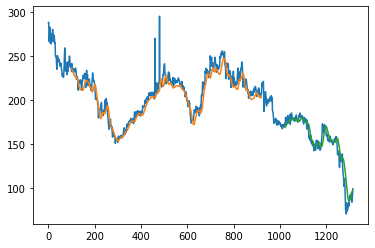

In [37]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(test_data)

395

In [46]:
x_input=test_data[294:].reshape(1,-1)
x_input.shape

(1, 101)

In [47]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [48]:
temp_input

[0.3737342334340025,
 0.3946082785574702,
 0.3810623556581986,
 0.3888346065020431,
 0.3701812044768165,
 0.3706253330964648,
 0.3775093267010126,
 0.3737342334340025,
 0.3644075324213893,
 0.3619648250133239,
 0.3615206963936756,
 0.36351927518209276,
 0.3593000532954344,
 0.35485876709895187,
 0.35374844554983126,
 0.3493071593533487,
 0.35774560312666553,
 0.36263101794279623,
 0.36729436844910296,
 0.36351927518209276,
 0.36729436844910296,
 0.3803961627287263,
 0.3706253330964648,
 0.3730680405045301,
 0.3755107479125956,
 0.38195061289749516,
 0.38839047788239484,
 0.3901669923609877,
 0.38905667081186707,
 0.39083318529046013,
 0.37706519808136435,
 0.38350506306626403,
 0.3510836738319418,
 0.3359833007639013,
 0.2991206253330964,
 0.30378397583940314,
 0.3191064132172677,
 0.3153313199502576,
 0.30111920412151366,
 0.308891454965358,
 0.2995647539527448,
 0.2629241428317642,
 0.2393853259904069,
 0.2342778468644519,
 0.2602593711138746,
 0.2618138212826436,
 0.2875732812222419

In [49]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.39460828 0.38106236 0.38883461 0.3701812  0.37062533 0.37750933
 0.37373423 0.36440753 0.36196483 0.3615207  0.36351928 0.35930005
 0.35485877 0.35374845 0.34930716 0.3577456  0.36263102 0.36729437
 0.36351928 0.36729437 0.38039616 0.37062533 0.37306804 0.37551075
 0.38195061 0.38839048 0.39016699 0.38905667 0.39083319 0.3770652
 0.38350506 0.35108367 0.3359833  0.29912063 0.30378398 0.31910641
 0.31533132 0.3011192  0.30889145 0.29956475 0.26292414 0.23938533
 0.23427785 0.26025937 0.26181382 0.28757328 0.30378398 0.2824658
 0.28357612 0.29157044 0.283132   0.26603304 0.26470066 0.27291704
 0.30289572 0.24316042 0.22250844 0.21007284 0.1916415  0.18653402
 0.16721443 0.13945639 0.16166282 0.17787351 0.15655534 0.14078877
 0.09237875 0.06373246 0.02154024 0.04907621 0.         0.00488541
 0.0566264  0.02464914 0.04952034 0.01399005 0.01709895 0.02709185
 0.0286463  0.03264345 0.03997158 0.05484988 0.03952745 0.06173388
 0.0846065  0.08438444 0.09304495 0.08371824 0.08060

8 day output [[0.1422067]]
9 day input [0.3615207  0.36351928 0.35930005 0.35485877 0.35374845 0.34930716
 0.3577456  0.36263102 0.36729437 0.36351928 0.36729437 0.38039616
 0.37062533 0.37306804 0.37551075 0.38195061 0.38839048 0.39016699
 0.38905667 0.39083319 0.3770652  0.38350506 0.35108367 0.3359833
 0.29912063 0.30378398 0.31910641 0.31533132 0.3011192  0.30889145
 0.29956475 0.26292414 0.23938533 0.23427785 0.26025937 0.26181382
 0.28757328 0.30378398 0.2824658  0.28357612 0.29157044 0.283132
 0.26603304 0.26470066 0.27291704 0.30289572 0.24316042 0.22250844
 0.21007284 0.1916415  0.18653402 0.16721443 0.13945639 0.16166282
 0.17787351 0.15655534 0.14078877 0.09237875 0.06373246 0.02154024
 0.04907621 0.         0.00488541 0.0566264  0.02464914 0.04952034
 0.01399005 0.01709895 0.02709185 0.0286463  0.03264345 0.03997158
 0.05484988 0.03952745 0.06173388 0.0846065  0.08438444 0.09304495
 0.08371824 0.08060934 0.08860366 0.09970688 0.08993605 0.06995026
 0.06995026 0.06972819 0.0

17 day output [[0.1763188]]
18 day input [0.36351928 0.36729437 0.38039616 0.37062533 0.37306804 0.37551075
 0.38195061 0.38839048 0.39016699 0.38905667 0.39083319 0.3770652
 0.38350506 0.35108367 0.3359833  0.29912063 0.30378398 0.31910641
 0.31533132 0.3011192  0.30889145 0.29956475 0.26292414 0.23938533
 0.23427785 0.26025937 0.26181382 0.28757328 0.30378398 0.2824658
 0.28357612 0.29157044 0.283132   0.26603304 0.26470066 0.27291704
 0.30289572 0.24316042 0.22250844 0.21007284 0.1916415  0.18653402
 0.16721443 0.13945639 0.16166282 0.17787351 0.15655534 0.14078877
 0.09237875 0.06373246 0.02154024 0.04907621 0.         0.00488541
 0.0566264  0.02464914 0.04952034 0.01399005 0.01709895 0.02709185
 0.0286463  0.03264345 0.03997158 0.05484988 0.03952745 0.06173388
 0.0846065  0.08438444 0.09304495 0.08371824 0.08060934 0.08860366
 0.09970688 0.08993605 0.06995026 0.06995026 0.06972819 0.05929117
 0.07039439 0.07949902 0.09482146 0.12702079 0.11663499 0.11836479
 0.12072977 0.12362991 

25 day output [[0.20323798]]
26 day input [0.39016699 0.38905667 0.39083319 0.3770652  0.38350506 0.35108367
 0.3359833  0.29912063 0.30378398 0.31910641 0.31533132 0.3011192
 0.30889145 0.29956475 0.26292414 0.23938533 0.23427785 0.26025937
 0.26181382 0.28757328 0.30378398 0.2824658  0.28357612 0.29157044
 0.283132   0.26603304 0.26470066 0.27291704 0.30289572 0.24316042
 0.22250844 0.21007284 0.1916415  0.18653402 0.16721443 0.13945639
 0.16166282 0.17787351 0.15655534 0.14078877 0.09237875 0.06373246
 0.02154024 0.04907621 0.         0.00488541 0.0566264  0.02464914
 0.04952034 0.01399005 0.01709895 0.02709185 0.0286463  0.03264345
 0.03997158 0.05484988 0.03952745 0.06173388 0.0846065  0.08438444
 0.09304495 0.08371824 0.08060934 0.08860366 0.09970688 0.08993605
 0.06995026 0.06995026 0.06972819 0.05929117 0.07039439 0.07949902
 0.09482146 0.12702079 0.11663499 0.11836479 0.12072977 0.12362991
 0.12694263 0.13054883 0.13434578 0.13825196 0.1422067  0.14616767
 0.15010694 0.1540074

In [50]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [51]:
import matplotlib.pyplot as plt

In [52]:
len(df1)

1316

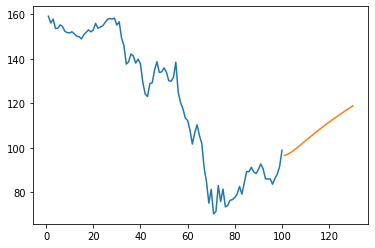

In [54]:
plt.plot(day_new,scaler.inverse_transform(df1[1216:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

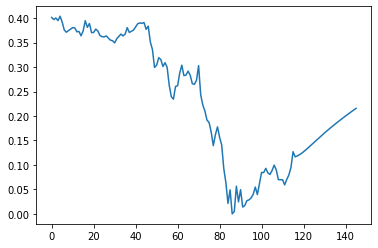

In [55]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [56]:
df3=scaler.inverse_transform(df3).tolist()

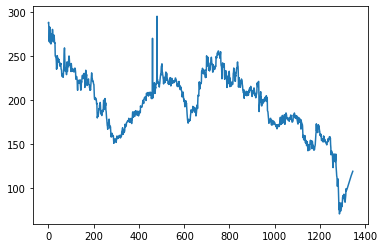

In [57]:
plt.plot(df3)